# Scientific Computing Coursework

## Ode solvers

Starting with ODE solvers, I coded up a function called "solve_to" which takes an ODE and solves it using either the Euler Method or the Runga Kutta 4 method. The function created takes seven inputs with the first being the ODE. The first thing to note with this is that in every ODE and PDE that I coded up in a function, I added "t" as the first input even if there was no time variable in the actual equation. This is so that all my functions are consistent in case I end up with an ODE or PDE that does end up requiring time as an input. An input that i had to add later on down the line as i tried more complex functions was "args" which takes the arguments of the ODE that is inputted and passes them through the ODE in the function. This is useful as we want to use the ODE function in our solver and not just the ODE at a singular point.

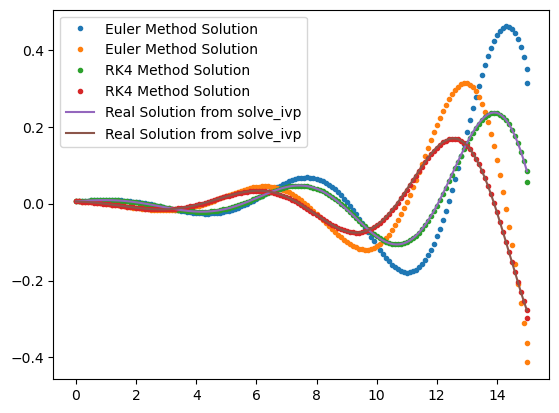

In [1]:
from IVPODEs import solve_to, VanDerPol_Ode
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

[t_total1, y_total1] = solve_to(VanDerPol_Ode,0,15,[0.006,0.006],0.1,'Euler', args = [0.5])
[t_total2, y_total2] = solve_to(VanDerPol_Ode,0,15,[0.006,0.006],0.1,'RK4', args = [0.5])
sol = solve_ivp(VanDerPol_Ode, [0, 15], [0.006,0.006], args=(0.5,), dense_output=True)

t_eval = np.linspace(0, 15, 150)
y_eval = sol.sol(t_eval) 
 

plt.plot(t_total1,y_total1,'.',label = 'Euler Method Solution')
plt.plot(t_total2,y_total2,'.',label = 'RK4 Method Solution')
plt.plot(t_eval,y_eval[0],label = 'Real Solution from solve_ivp')
plt.plot(t_eval,y_eval[1],label = 'Real Solution from solve_ivp')
plt.legend(loc = 'upper left')
plt.show()

The figure above is showing both methods being used to solve the Van Der Pol equation which is a second order ODE. From this figure we can see that the RK4 method does a much better job at solving the ode than the Euler solution. Although this could just be because solve_ivps default solver is also RK4.

# Numerical Shooting

Numerical shooting was tough to understand, however fairly easy to implement once understood. The main function I use is called "shooting" and it pairs the two conditions needed for a limit cycle to occur. One interesting tool i learnt here was pythons unpacking function "*". This allows any lists that are passed next to it to be unpacked into their indivual elements. I also had to implement an if statement that checked if there were any extra conditions as python didn't like having arguments for odes that had no conditions. The next main function i created is called "shooting_solve" which takes the conditions from "shooting" and uses "scipy.optimise.root" to root find the solutions to the conditions for a given ODE.

[-2.01989105e+00  1.25262100e-29  7.62987124e+00]


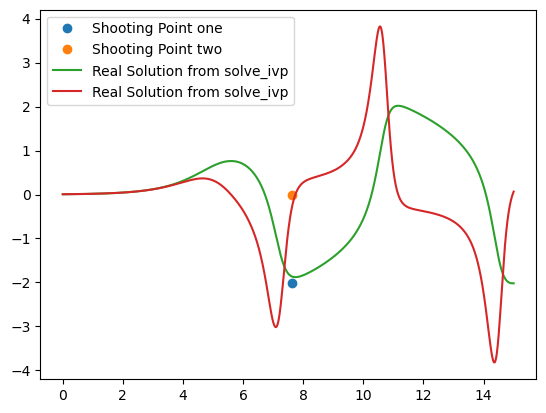

In [2]:
from Numerical_Shooting import shooting_solve
sol = solve_ivp(VanDerPol_Ode, [0, 50], [0.006,0.006], args=(2,), dense_output=True)
t_eval = np.linspace(0, 15, 1500)
y_eval = sol.sol(t_eval) 

sol = shooting_solve(VanDerPol_Ode, [0.5, 0.5,6], [2])
print(sol)

plt.plot(sol[2],sol[0],'o',label = 'Shooting Point one')
plt.plot(sol[2],sol[1],'o',label = 'Shooting Point two')
plt.plot(t_eval,y_eval[0],label = 'Real Solution from solve_ivp')
plt.plot(t_eval,y_eval[1],label = 'Real Solution from solve_ivp')
plt.legend(loc = 'upper left')
plt.show()

In the figure above we can see how the two points lie on the solved Van Der Pol Ode for mu = 2. This is where the start of the limit cycle occurs, hence the strange solution of the ODE compared to the last figure. The first point is slightly off the graph as with the second point but that is most probably due to my initial guesses as they arent always close.

# Code Testing

To test my code i decided to use a package called pytest. This was because I had previous experience using it before and therefore felt more comfortable using it. Using pytest, I was able to set up a few tests on each of my main functions that checked wether or not the function would still work when given an equation that I was using to test the functions. The good thing about this was that it the testing equation is always different to the ones that I was using in my main code which allowed me to make sure the function was generalised every time I changed it. One downside to my code is that it didnt have checks for all of the different input types that could have caused a problem. In the future I would implement this as it adds another layer of protection against problems in my code. I also coded up the code testing fairly late in the process of the course which i now realise is a mistake as it would have saved me a lot of time if I caught any problems right away.

# Numerical Continuation

This part of the coursework was by far the hardest to code up compared to the rest of the course. Most notably pseudo arclength numerical continuation. Both my "natural_parameter" and "pseudo_arclength" functions have the same number of inputs. I chose to do this even tho pseudo arclength requires an extra point to start as this allows me to compare the two a lot easier. To get the second point that is needed for pseudo arclength, i call the natural parameter function to find the next point. I chose to do this instead of allowing the user to input a second known point as i felt it makes it easier to use. In future I could add the functionality to enter in two known points instead of using the natural parameter function so that you can have the choice as to wether you'd like to use your own points or a point collected through natural parameter continuation.

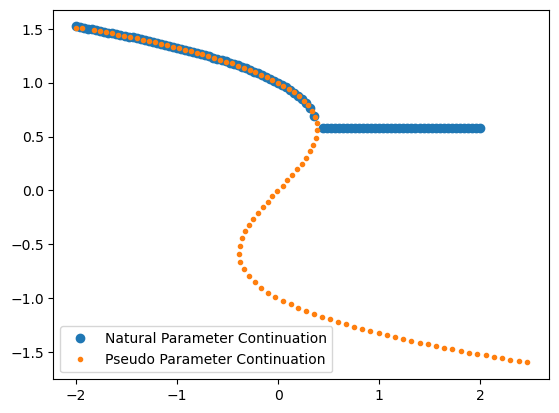

In [12]:
from Numerical_cont import funct, hopf_ode, natural_parameter, pseudo_parameter

y1,x1 = natural_parameter(funct, 1.521, -2,2,100)
y2,x2 = pseudo_parameter(funct, 1.521, -2,4,100)

plt.plot(y1,x1,'o',label = 'Natural Parameter Continuation')
plt.plot(y2,x2[0,:],'.',label = 'Pseudo Parameter Continuation')
plt.legend(loc= 'lower left')
plt.show()


The graph above is showing how natural parameter continuation fares against a cubic function compared to pseudo parameter continuation. As can be seen, pseudo arclength continuation follows the curve while natural paramter continuation gets stuck where the curve starts to go back on itself. For my psuedo arclength continuation function, I have to call the function to be between 2 and -4 rather than 2 and -2. This is because in the function i have an if statement that checks if the amount of iterations has gone past the number of inputted steps that the user would like. At the start the function divides the section up into an equal amount of points across the section which is incorrect as between -0.5 and 0.5 there are double the amount of points. In the future, I would like to change this so that the function maps from p0 to p1 no matter how many points are in between. 

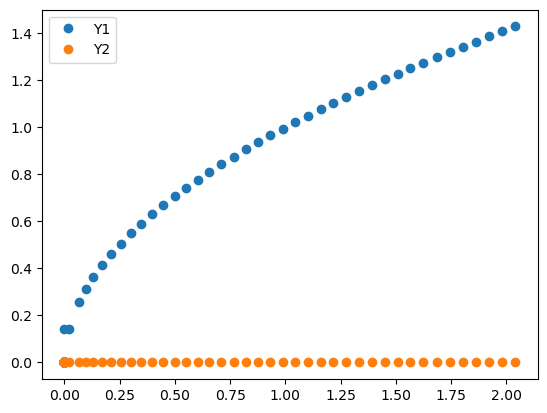

In [4]:
x3,y3 = pseudo_parameter(hopf_ode, (0.1,0,6), 0, 2, 100, discretisation='shooting')

    
plt.plot(x3,y3[0,:],'o',label = 'Y1')
plt.plot(x3,y3[1,:],'o',label = 'Y2')
plt.legend(loc = 'upper left')

I was also able to incorporate my shooting function in with the pseudo arclength continuation function which when run with hopf bifurcation normal form, we get this graph above. The graph is showing the pitchfork bifurcation that occurs with hopf however it is only plotting the positive values suggesting that my code isn't running through all the Y1 values that it could be. In the future, I would like to fix this problem. 

# Finite Difference Methods

Coding up finite difference methods was fairly straight forward. The main struggle I had was generalising the code for a source term that involved u. I solve this however by using an if statement that checked if the source term was an integer or not, allowing me to separate the function into sections where one takes a function and the other takes an integer.

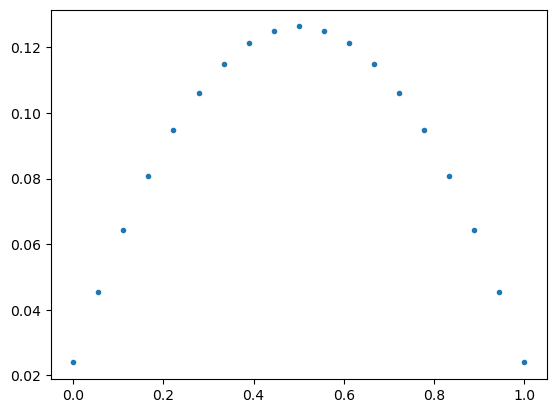

In [5]:
from BoundaryValueClass import finite_solver, q

a = 0
b = 1
N = 20

left_boundary = 0
right_boundary = 0
grid = np.linspace(a,b,N-1)
initial_guess = 0.1 *grid
dx = (a-b)/N
sol = finite_solver(initial_guess, dx, N, left_boundary, right_boundary, q, 1, [0.1])
    
plt.plot(grid,sol.x,'.')
plt.show()

The graph above is showing the solution my graph gives to the bratu problem with dirichlet boundary conditions.

# PDE Solvers

For my PDE solvers, I started off coding them in nested for loops. However, I quickly realised that coding them up is a lot easier and runs a lot faster when coding them in matrix form. Therefore, I created a function called ConstructAandB which takes in seven inputs and outputs your A and B matrices. Within this i also have some if statements that change both the A and B matrix depending on the type of boundary condition used. I chose to take an input called robin_gamma so that the function takes in the separate u dependent variable when constructing the A and B matrices. I also coded up a function that created the vector of my initial condition as that was needed throughout each of the methods.

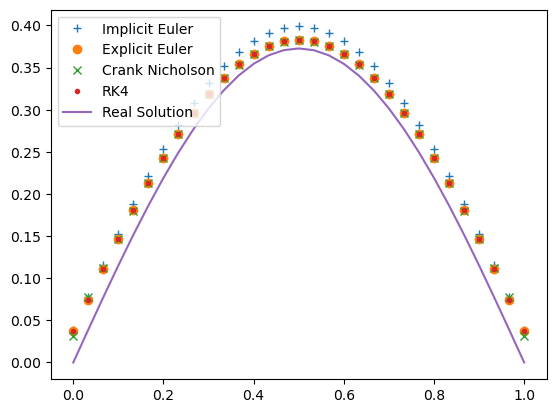

In [11]:
    from ImplicitEuler import *
    N = 31
    D = 0.1
    a = 0
    b = 1
    bc_left = 0
    bc_right = 0
    t_end = 1
    dt = 0.1
    real_x = np.linspace(0,1,N)
    
    
    
    
    U_exact_rk4, X = RK4PDESolver(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D) 
    U_exact_Euler, X = EXPEulerPDESolver(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D) 
    U_Imp,X_Imp = ImplicitEuler(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D)
    U_Crank,X_Crank = CrankNicholson(N,a,b,bc_left,bc_right,t_end,InitialCond,dt,D) 
    real_U = Actual_sol(real_x,1,0,1,D)
    plt.plot(X_Imp,U_Imp[:,-1],'+', label = 'Implicit Euler')
    plt.plot(X, U_exact_Euler[-1],'o',label = 'Explicit Euler')
    plt.plot(X_Crank,U_Crank[:,-1],'x',label = 'Crank Nicholson')
    plt.plot(X, U_exact_rk4[-1],'.',label = 'RK4')
    plt.plot(real_x,real_U, label = 'Real Solution')
    plt.legend(loc = 'upper left')
    plt.show()

The figure above shows each of the solvers plotting a solution to the generalised diffusion equation. Unfortunately i was unable to get the solvers to work with different boundary conditions and therefore it is only with dirichlet boundary conditions. Another downside to my code is that they are all separate instead of being in one big PDE solver which given more time, i would have implemented. I'm very glad however, that i got my previous solve_to function working in the Explicit Euler and RK4 PDE solvers, showing solve_to to be generalised. 